In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv('/kaggle/input/climate-change/climate_change_data.csv')
df.head()

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164


In [4]:
df.shape

(10000, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            10000 non-null  object 
 1   Location        10000 non-null  object 
 2   Country         10000 non-null  object 
 3   Temperature     10000 non-null  float64
 4   CO2 Emissions   10000 non-null  float64
 5   Sea Level Rise  10000 non-null  float64
 6   Precipitation   10000 non-null  float64
 7   Humidity        10000 non-null  float64
 8   Wind Speed      10000 non-null  float64
dtypes: float64(6), object(3)
memory usage: 703.2+ KB


In [5]:
df.describe()

,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,14.936034,400.220469,-0.003152,49.881208,49.771302,25.082066
std,5.030616,49.696933,0.991349,28.862417,28.929320,14.466648
min,-3.803589,182.131220,-4.092155,0.010143,0.018998,0.001732
25%,11.577991,367.109330,-0.673809,24.497516,24.713250,12.539733
50%,14.981136,400.821324,0.002332,49.818967,49.678412,24.910787
75%,18.305826,433.307905,0.675723,74.524991,75.206390,37.670260
max,33.976956,582.899701,4.116559,99.991900,99.959665,49.997664


Based on the descriptive features of our dataset, we see that; The variability in CO2 emissions, temperature, and precipitation suggests potential correlations that could be explored in further analysis .Furthermore,both precipitation and humidity have similar standard deviations, indicating that the variability in these two features could be comparable. Areas such as sea level rise and extreme humidity should be investigated further to understand underlying causes and implications.

In [9]:
df['Country'].value_counts()

Country
Congo                        94
Korea                        76
Tanzania                     61
Armenia                      58
French Guiana                58
                             ..
Saint Pierre and Miquelon    28
Chile                        28
Dominican Republic           28
Syrian Arab Republic         27
Saint Kitts and Nevis        23
Name: count, Length: 243, dtype: int64

In [10]:
df['Location'].value_counts()

Location
North David          12
Lake James           11
New James            10
West John            10
Lake Michael         10
                     ..
South Corey           1
Madisonborough        1
Lake Matthewberg      1
North Williamton      1
West Anthonyburgh     1
Name: count, Length: 7764, dtype: int64

In [11]:
df['Date']=pd.to_datetime(df['Date'])
df['Date Only']=df['Date'].dt.date
df['Year']=df['Date'].dt.year
df.head()

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed,Date Only,Year
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026,2000-01-01,2000
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300,2000-01-01,2000
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261,2000-01-02,2000
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563,2000-01-03,2000
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164,2000-01-04,2000


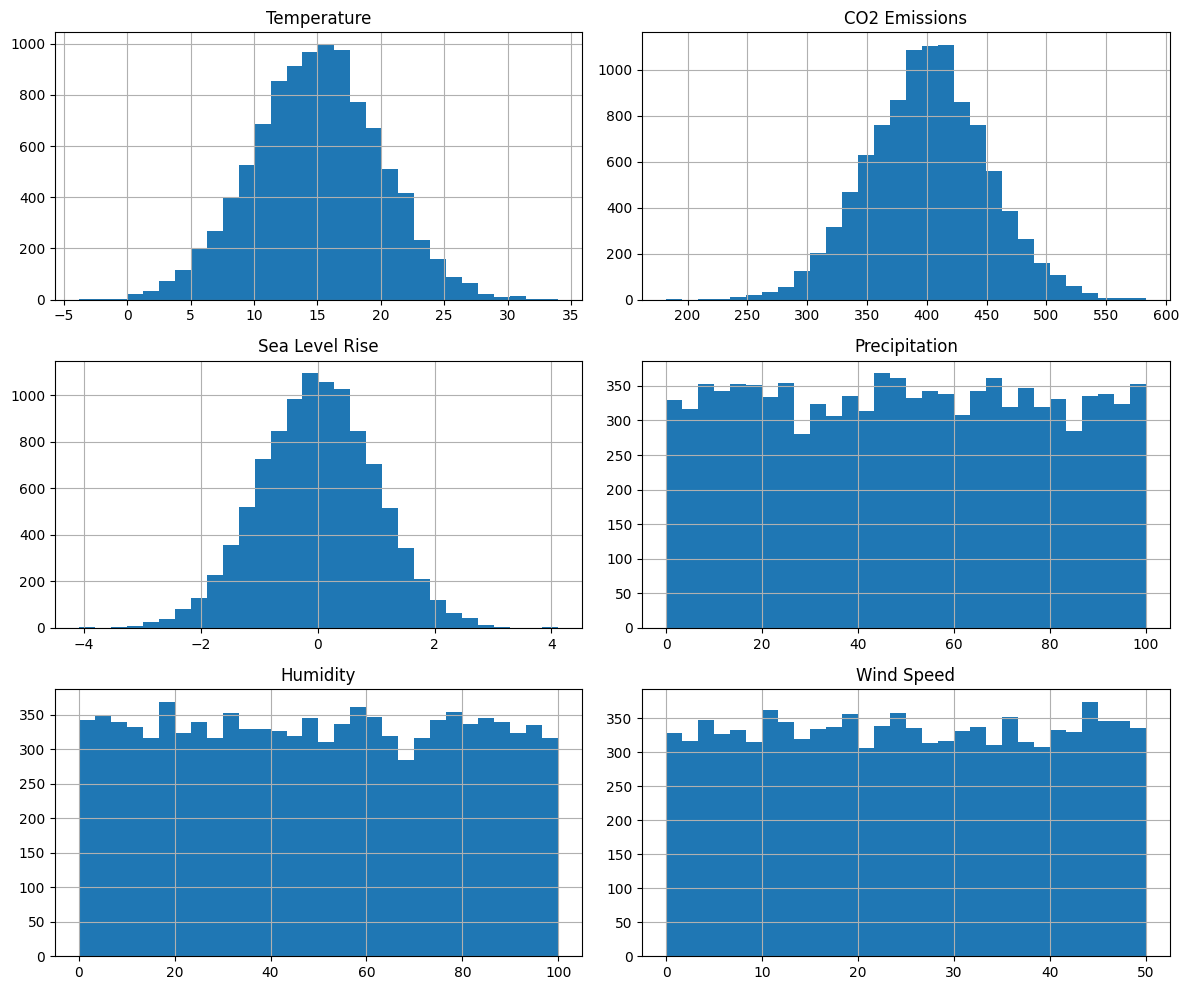

In [37]:
df[['Temperature', 'CO2 Emissions','Sea Level Rise', 'Precipitation', 'Humidity', 'Wind Speed']].hist(figsize=(12, 10), bins=30)
plt.tight_layout()

Upon visualizing our histograms, the following observations can be drawn;

**1. Temperature**
-The temperature histogram shows a roughly normal distribution, with most values clustering around a central point.The normal distribution suggests that temperature readings are stable and predictable, which is beneficial for modeling. 

**2. CO2 Emissions**
-The CO2 emissions histogram is also approximately normal, with values concentrated around 400 ppm.This suggests that CO2 levels are relatively stable over time. The normal distribution may imply consistent emission sources, which can be useful for predicting future CO2 impacts on temperature.

**3. Sea Level Rise**
- The sea level rise histogram is approximately normal as well.

**4. Precipitation**
- The precipitation histogram shows a more uniform distribution, with values spread across the range.This indicates variability in rainfall patterns. Furthermore, the precipitation has a defined range from 0 to 100 meaning that values outside this range has a probability of zero.

**5. Humidity**
- The humidity histogram shows a relatively uniform distribution as well across the range of 0% to 100%.

**6. Wind Speed**
- The wind speed histogram shows a uniform distribution, with values ranging from 0 to 50 km/h.

### Summary
Overall, the histograms indicate that while some features like : temperature, CO2 emissions, Sea Level rise exhibit normal distributions, others like; precipitation, humidity, wind speed show more variability.

**Top 10 Country for CO2 Emission in kilotons**

                 Country  CO2 Emissions
49                 Congo   38067.606470
114                Korea   30153.056279
214             Tanzania   23563.231008
10               Armenia   23053.890323
78               Georgia   22829.104137
73         French Guiana   22776.702525
123        Liechtenstein   22183.405839
5                 Angola   21973.723827
237              Vietnam   21679.554056
8    Antigua and Barbuda   21583.441716


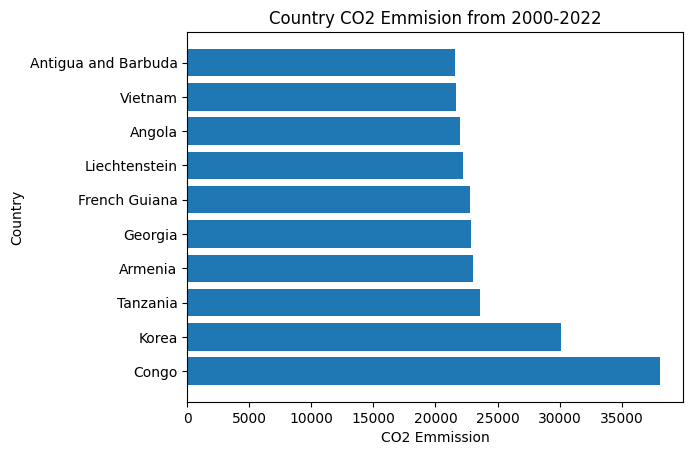

In [43]:
# Group the data by country and calculate the total CO2 emissions for each country
df_country_co2 = df.groupby('Country')['CO2 Emissions'].sum().reset_index()

# Sort the data in descending order
df_country_co2 = df_country_co2.sort_values('CO2 Emissions',ascending=False)

# Select the top ten countries
df_country_co2 = df_country_co2.head(10) 

# Display the top ten countries for CO2 emissions
print(df_country_co2)

# Plot line graph of CO2 emissions
plt.barh(df_country_co2['Country'], df_country_co2['CO2 Emissions'])

# Add labels and title
plt.xlabel('CO2 Emmission')
plt.ylabel('Country')
plt.title('Country CO2 Emmision from 2000-2022')
plt.show()

Text(0.5, 1.0, 'Box Plots of Features')

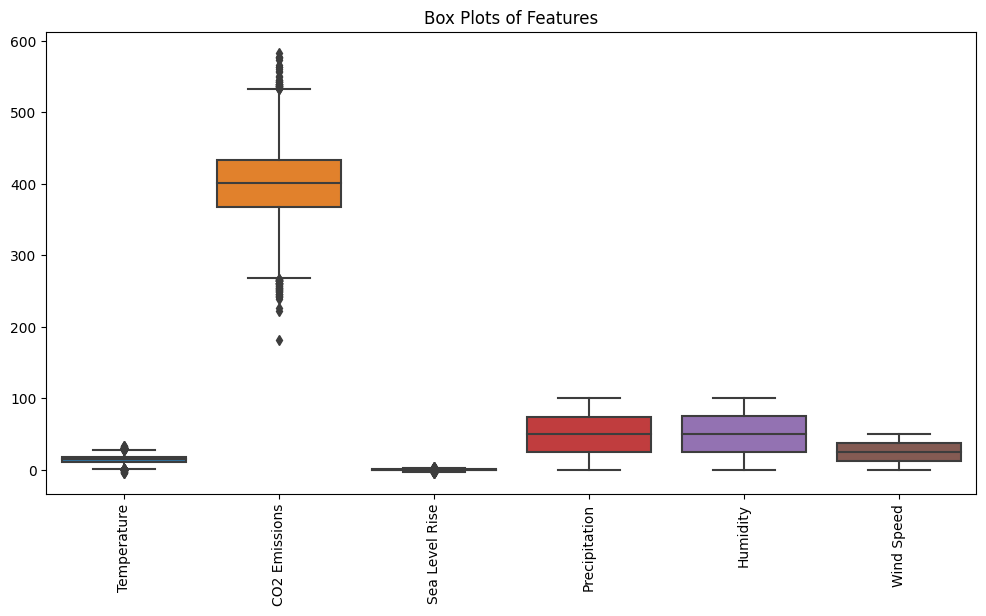

In [39]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Box Plots of Features')

We observe that some features like Temperature, CO2 Emissions and Sea Level Rise  have some outliers. I now went forth to look at each of each of these features individually for the purpose of clarity.

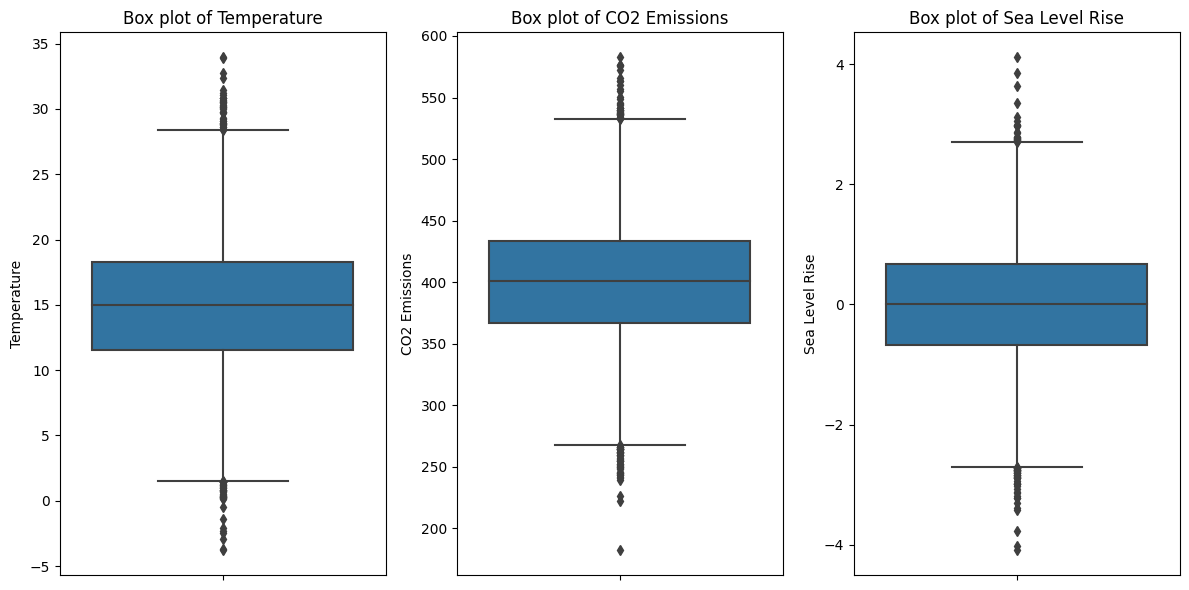

In [41]:
features = ['Temperature','CO2 Emissions','Sea Level Rise']

fig, axs = plt.subplots(1,3,figsize = (12,6))

for ax,feature in zip(axs, features):
    sns.boxplot(y = feature,data=df, ax = ax)
    ax.set_title(f'Box plot of {feature}')
    
plt.tight_layout()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


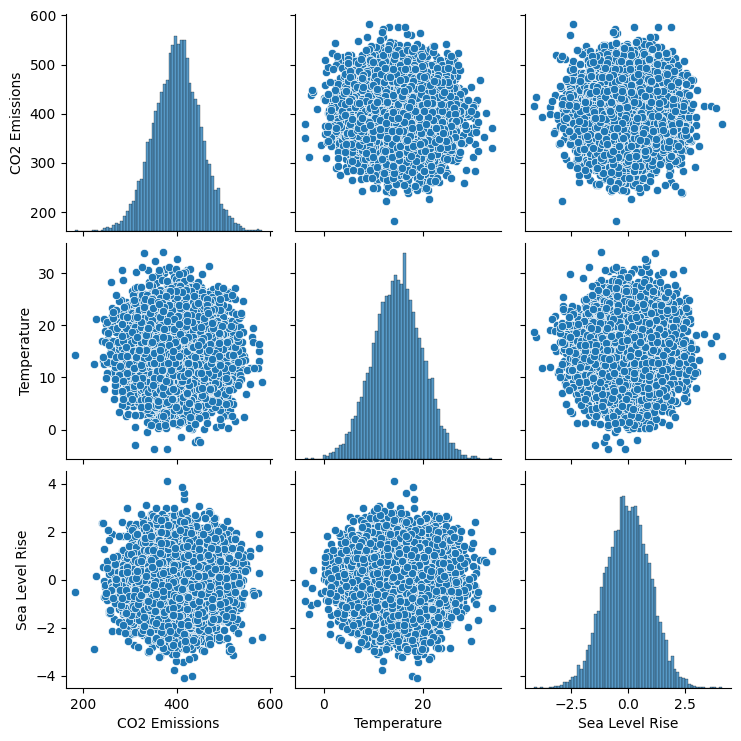

In [42]:
sns.pairplot(df, vars=['CO2 Emissions', 'Temperature', 'Sea Level Rise'])

<Axes: >

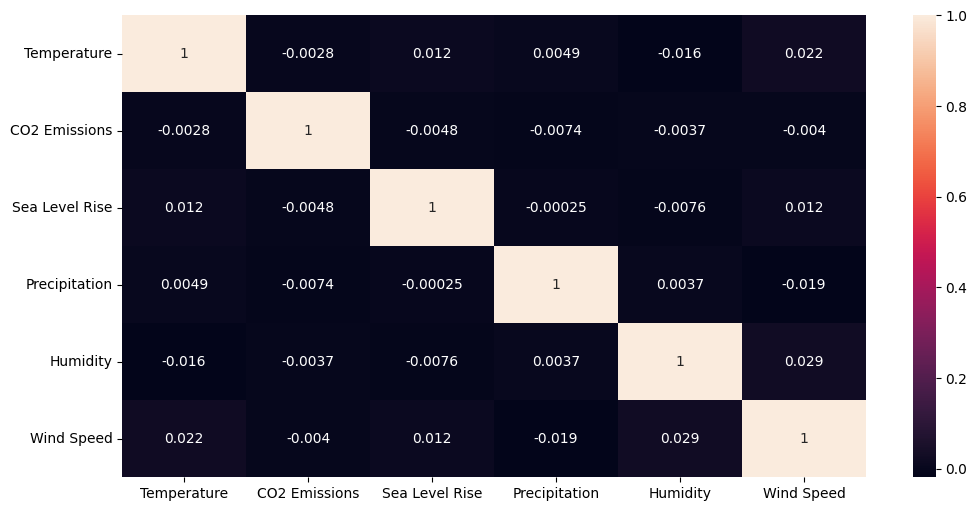

In [46]:
numeric_cols = ['Temperature', 'CO2 Emissions', 'Sea Level Rise', 'Precipitation', 'Humidity', 'Wind Speed']
df_numeric = df[numeric_cols]

# Calculate the correlation matrix on the DataFrame containing the numeric columns
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(12,6))
sns.heatmap(correlation_matrix, annot = True)

The correlation coefficients are relatively low with the highest correlation coefficient being 0.022 between temperature and wind speed which just goes further to imply that, there exist a weak linear relationship between temperature and the other features.

# Model Performance Before Removing Outliers

In [88]:
# Split the data into training and testing sets
X = df[['Temperature', 'CO2 Emissions', 'Precipitation', 'Humidity', 'Wind Speed']]
y = df['Sea Level Rise']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear Regression

In [89]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)
print('Linear Regression - MSE:', linear_mse)
print('Linear Regression - R2 Score:', linear_r2)

Linear Regression - MSE: 0.9597190687425378
Linear Regression - R2 Score: -0.0008127219573517142


### Random Forest

In [90]:
# Random Forest Regression
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
print('Random Forest Regression - MSE:', rf_mse)
print('Random Forest Regression - R2 Score:', rf_r2)

Random Forest Regression - MSE: 0.9971866972760248
Random Forest Regression - R2 Score: -0.0398846551085994


### Decision Tree


In [91]:
# Decision Tree Regression
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)
print('Decision Tree Regression - MSE:', dt_mse)
print('Decision Tree Regression - R2 Score:', dt_r2)

Decision Tree Regression - MSE: 2.1692790472258894
Decision Tree Regression - R2 Score: -1.262164146413991


# IQR Method For Removing Outliers

IQR - Inter Quartile Range  
Q1 - 25th percentile   
Q2 - 50th percentile (Median)   
Q3 - 75th percentile   

Used for skewed data.   
In this method, we calculate the minimum and maximum value. If any value is less than minimum value or greater than maximum value, then it is considered as an outlier.    
IQR = Q3 - Q1   
Minimum = Q1 - 1.5 * IQR   
Maximum = Q3 + 1.5 * IQR   

In [50]:
features

['Temperature', 'CO2 Emissions', 'Sea Level Rise']

In [75]:
df_out = df.copy()

In [81]:
# Define attributes and create an empty DataFrame to store outliers
attributes = ['Temperature', 'CO2 Emissions', 'Sea Level Rise']
outliers = pd.DataFrame()

# Loop through each attribute and get the outliers
for col in attributes:
    data = df_out[col]
    
    # Calculate the bounds for each attribute
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Select rows with outliers in the current attribute
    outliers_col = df_out[(data < lower_bound) | (data > upper_bound)]
    outliers = pd.concat([outliers, outliers_col])

df_no_outliers.dropna(inplace=True)
# Drop duplicate rows if any outliers were detected in multiple attributes
outliers = outliers.drop_duplicates()

outliers.head()


/tmp/ipykernel_36/2431003097.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.dropna(inplace=True)


,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed,Year
84,2000-03-11 13:36:33.699369937,Gordonport,Ecuador,29.090744,404.828451,-1.959734,15.245286,20.355855,39.556756,2000
160,2000-05-14 09:55:21.332133212,New Kathleen,Sao Tome and Principe,28.944172,421.831009,-0.236732,84.904945,65.889211,16.269138,2000
288,2000-08-29 22:39:38.397839784,Harperport,Solomon Islands,0.141787,431.431906,0.033187,29.198585,36.652269,16.825047,2000
480,2001-02-07 05:46:03.996399636,Lake Leahburgh,Congo,30.554231,338.373171,-0.464692,66.163779,5.846293,46.685396,2001
544,2001-04-02 00:08:12.529252920,Moraborough,Liechtenstein,30.609992,420.796144,-0.257760,67.978381,58.082146,14.480108,2001


In [82]:
print("Shape of outliers:", outliers.shape)

Shape of outliers: (223, 10)


## 4. Model Performance After Removing Outliers

In [84]:
# Split the data into training and testing sets
X = df_no_outliers[['Temperature', 'CO2 Emissions', 'Precipitation', 'Humidity', 'Wind Speed']]
y = df_no_outliers['Sea Level Rise']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###  StandardScaler


In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear Regression


In [85]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)
print('Linear Regression - MSE:', linear_mse)
print('Linear Regression - R2 Score:', linear_r2)

Linear Regression - MSE: 0.9782411883549432
Linear Regression - R2 Score: 4.734918168314284e-05


### Random Forest


In [86]:
# Random Forest Regression
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
print('Random Forest Regression - MSE:', rf_mse)
print('Random Forest Regression - R2 Score:', rf_r2)

Random Forest Regression - MSE: 1.0210510454835948
Random Forest Regression - R2 Score: -0.043712646437532365


### Decision Tree


In [87]:
# Decision Tree Regression
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)
print('Decision Tree Regression - MSE:', dt_mse)
print('Decision Tree Regression - R2 Score:', dt_r2)

Decision Tree Regression - MSE: 1.9942194147146435
Decision Tree Regression - R2 Score: -1.0384798900265846


Though there was some slight changes, our model still performed poorly despite removing outliers from the dataset which only goes to imply that the presence of outliers was not what significantly affected our model performance.

# Conclusion

Most of the locations like; New Christopherland East Brittanyside and amongst others appear quite fictional and uncommon. The countries listed are real, but their corresponding locations need some validation. Furthermore, negative temperatures in tropical countries suggest data entry errors or inconsistencies leading to unrealistic modelling outcomes. As a result, some of these inconsistencies therefore likely contributed to our poor model performance.